
##**STOCK PRICE PREDICTION USING ARMA & LSTM MODELS**



---



## Importing the libraries

In [19]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.9 MB/s eta 0:00:00


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import tensorflow.keras as tf
import os
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

## Importing information


In [2]:
data=yf.download('HDB',period='10y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,HDB,HDB,HDB,HDB,HDB,HDB
Date,,,,,,
2014-12-29,23.773779,25.150,25.280001,25.025000,25.155001,536400
2014-12-30,23.953382,25.340,25.540001,25.160000,25.160000,875400
2014-12-31,23.986465,25.375,25.504999,25.320000,25.434999,674200
2015-01-02,24.567820,25.990,26.139999,25.705000,25.870001,1306000
2015-01-05,24.317318,25.725,25.915001,25.504999,25.680000,1420200


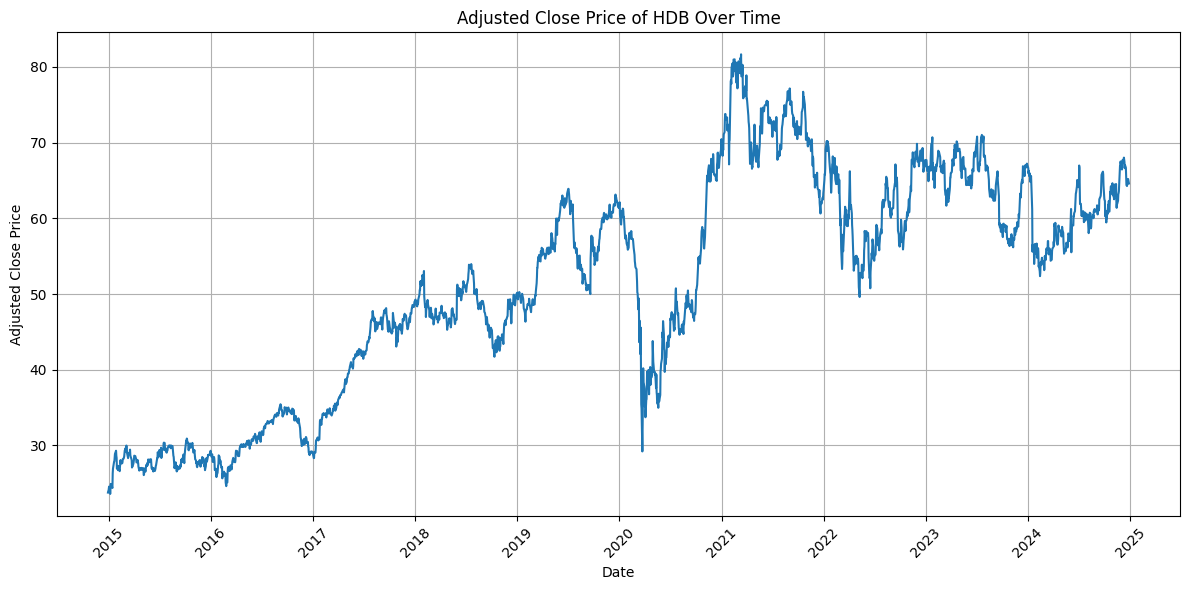

In [5]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(data.index, data['Adj Close'])  # Use data.index to access the dates
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price of HDB Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

This series is not stationary. Mean price is not constant and hence we can apply differencing to attain stationarity.(Yt=Xt-Xt-1)

#ARMA Model

Text(0, 0.5, 'difference price')

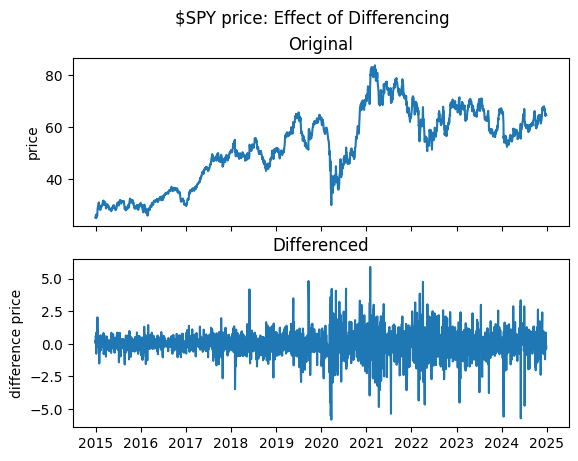

In [11]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('$SPY price: Effect of Differencing')
ax1.plot(data['Close'])
ax1.set_ylabel('price')
ax1.set_title('Original')
ax2.plot(data['Close'].diff())
ax2.set_title("Differenced")
ax2.set_ylabel('difference price')

##Apply ADF to formally check for stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller

def ADF_Cal(x):
    result = adfuller(x)
    ADF_stat = result[0]
    p = result[1]
    print("ADF Statistic: %f" % ADF_stat)
    print("p-value: %f" % p)
    print("Critical Values")
    levels = [.01, .05, .1]
    i = 0
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key,value))
        hyp = p < levels[i]
        if ADF_stat < value:
            cert = (1-levels[i])*100
            print('Reject H0: {}'.format(hyp))
            break
        i = i+1
        if i >= 3:
            print("Less than 90% certain that data is stationary")
            print('Reject H0: {}'.format(hyp))

ADF_Cal(data['Close'].diff()[1:])

ADF Statistic: -21.536522
p-value: 0.000000
Critical Values
	1%: -3.433
Reject H0: True


Plot ACF AND PACF for ARMA(p,q) model

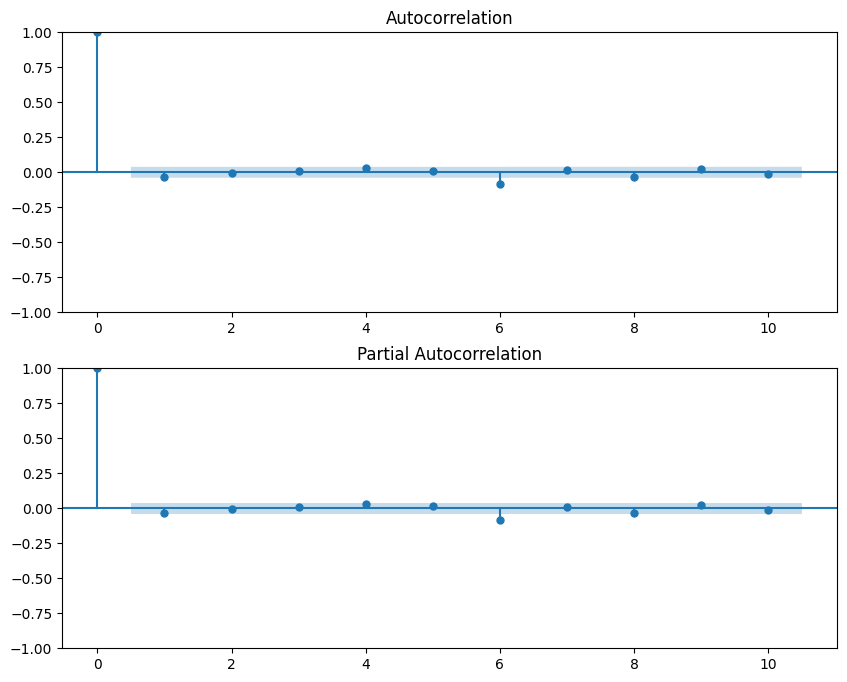

In [22]:
diff_ts = data['Close'].diff()[1:]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(diff_ts, ax=ax1, lags = 10)
plot_pacf(diff_ts, ax=ax2, lags = 10)
plt.show()

##Split for train and test

In [25]:
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data.iloc[:,4],test_size=0.3,random_state=42,shuffle=False)

##Model Check

In [28]:
model=pm.auto_arima(data_train,start_p=0,d=1,start_q=0,
          max_p=5,max_d=1,max_q=5, start_P=0,
          D=0, start_Q=0, max_P=5,max_D=0,
          max_Q=5, seasonal=False,
          error_action='warn',trace=True,
          supress_warnings=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4343.465, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4344.792, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4344.849, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4342.660, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4342.406, Time=3.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4341.748, Time=1.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4342.841, Time=0.34 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4342.241, Time=1.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4341.474, Time=0.98 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4343.302, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4341.875, Time=1.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4340.361, Time=0.66 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4341.196, Time=0.67 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1761
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -2165.799
Date:                Mon, 30 Dec 2024   AIC                           4339.599
Time:                        11:25:06   BIC                           4361.491
Sample:                             0   HQIC                          4347.689
                               - 1761                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0131      0.012     -1.101      0.271      -0.036       0.010
ma.L2          0.0492      0.014      3.634      0.000       0.023       0.076
ma.L3         -0.0516      0.016     -3.326      0.001      -0.082      -0.021
sigma2         0.6861      0.011     61.641      0.000       0.664       0.708
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3677.89
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               9.19   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
ar_mod = ARIMA(data_train, order=(0,1,3))
ar_fit = ar_mod.fit()
print(ar_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        ('Open', 'HDB')   No. Observations:                 1761
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -2165.799
Date:                Mon, 30 Dec 2024   AIC                           4339.599
Time:                        11:36:56   BIC                           4361.491
Sample:                             0   HQIC                          4347.689
                               - 1761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0131      0.012     -1.101      0.271      -0.036       0.010
ma.L2          0.0492      0.014      3.634      0.000       0.023       0.076
ma.L3         -0.0516      0.016     -3.326      0.0

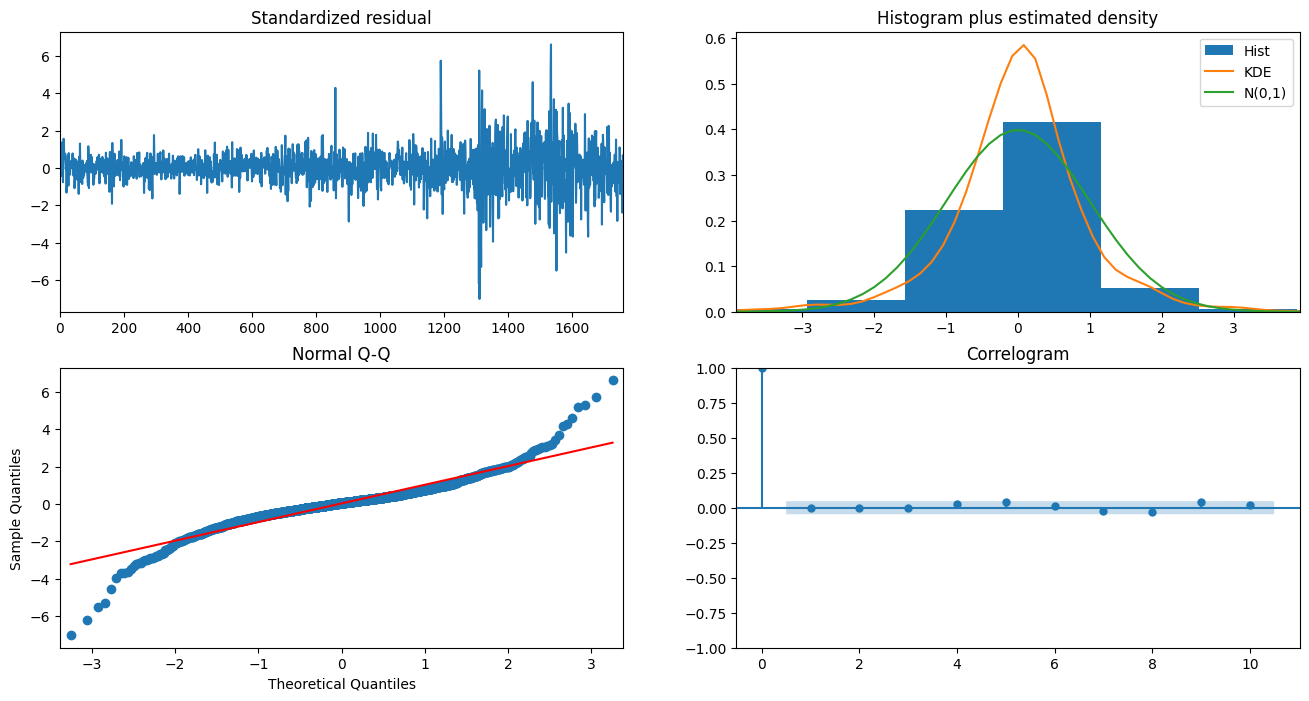

In [36]:
plt.rc("figure", figsize=(16,8))
model.plot_diagnostics()
plt.show()

##Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


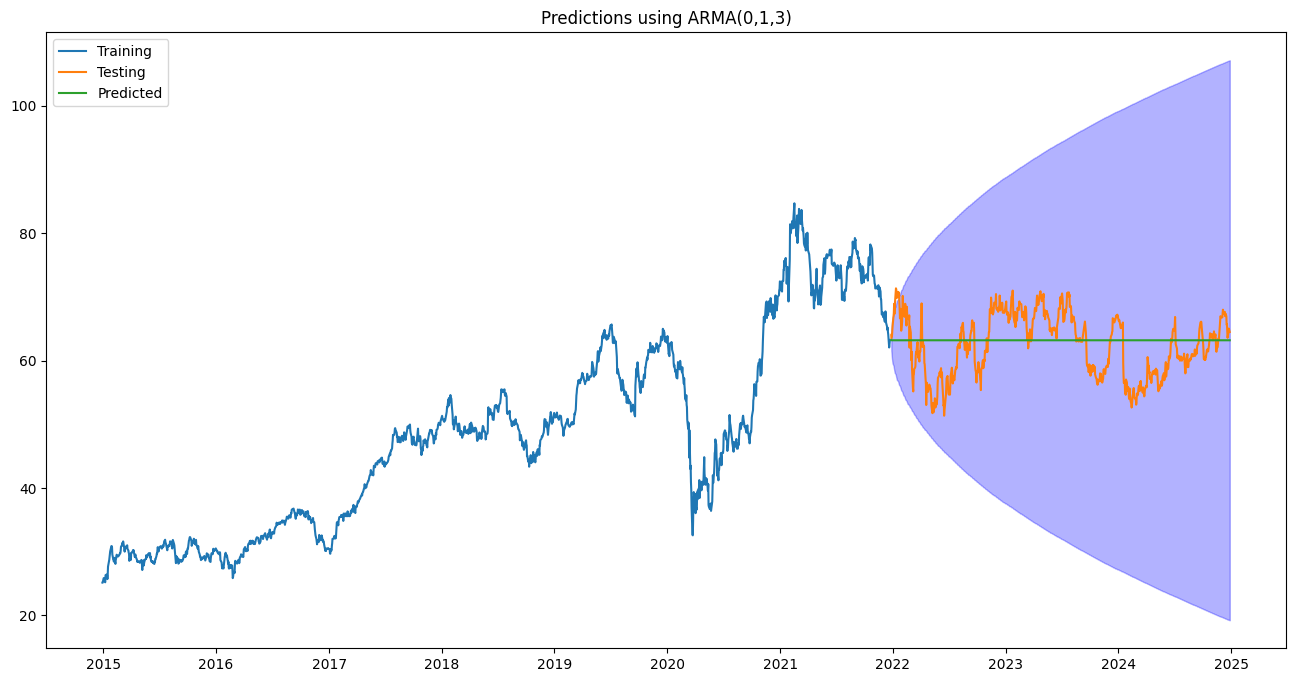

In [38]:
# Obtain predictions from ARMA(1,0) model on X_t
ar_preds = pd.DataFrame(ar_fit.forecast(data_test.shape[0]))
ar_preds['date'] = data_test.index
ar_preds = ar_preds.set_index('date')
ar_preds.columns = ['predictions']

# Get CI
ar_pred_ci = ar_fit.get_forecast(data_test.shape[0]).conf_int()
ar_pred_ci['date'] = data_test.index
ar_pred_ci = ar_pred_ci.set_index('date')
# Make plot of predictions
plt.plot(data_train,label="Training")
plt.plot(data_test,label="Testing")
plt.plot(ar_preds['predictions'],label="Predicted")
plt.fill_between(ar_pred_ci.index, ar_pred_ci.iloc[:,0], ar_pred_ci.iloc[:,1], color='blue', alpha=0.3)
plt.legend(loc = 'upper left')
plt.title('Predictions using ARMA(0,1,3)')
plt.show()

##Evaluation Metrics

In [41]:
results = {'MAPE': [mean_absolute_percentage_error(data_test,ar_preds['predictions']) * 100],
        'MSE': [mean_squared_error(data_test,ar_preds['predictions'])]}

print(results)

{'MAPE': [6.858302885055342], 'MSE': [23.899560934141565]}


The is around 6.85 percent error in the predictions and the value of it around 24 squared rupees.


#LSTM

##Scaling the data

In [8]:
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.preprocessing import StandardScaler as ss
scaler=mms(feature_range=(0,1))
data_train_scaled=scaler.fit_transform(np.array(data_train).reshape(-1,1))
data_test_scaled=scaler.fit_transform(np.array(data_test).reshape(-1,1))

## Creating a pattern array to feed into model:

---



In [ ]:
def createPatternSet(data_train_scaled,steps):
  x_pattern=[]
  y_price=[]
  for day in range(steps,len(data_train_scaled)):
    row=data_train_scaled[day-steps:day,0]
    x_pattern.append(row)
    y_price.append(data_train_scaled[day])
  x_pattern,y_price=np.array(x_pattern),np.array(y_price)
  x_pattern=x_pattern.reshape(x_pattern.shape[0],x_pattern.shape[1],1)
  return x_pattern,y_price

In [ ]:
x_train_final=createPatternSet(data_train_scaled,25)[0]
y_train_final=createPatternSet(data_train_scaled,25)[1]
x_test_final=createPatternSet(data_test_scaled,25)[0]
y_test_final=createPatternSet(data_test_scaled,25)[1]

### Building the Model


In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train_final.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 25, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 25, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 25, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 25, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 25, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 25, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train_final,y_train_final,epochs=50,batch_size=32)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - loss: 0.0780
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0096
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 0.0085
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0078
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0073
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0112
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 0.0068
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0060
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0081
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0068
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0064
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0054
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0050
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0050
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0056

##Plot the actual prices and predictions over training data

In [ ]:
y_pred=model.predict(x_train_final)

55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step


In [ ]:
y_pred=scaler.inverse_transform(y_pred)

In [ ]:
y_train=scaler.inverse_transform(y_train_final)


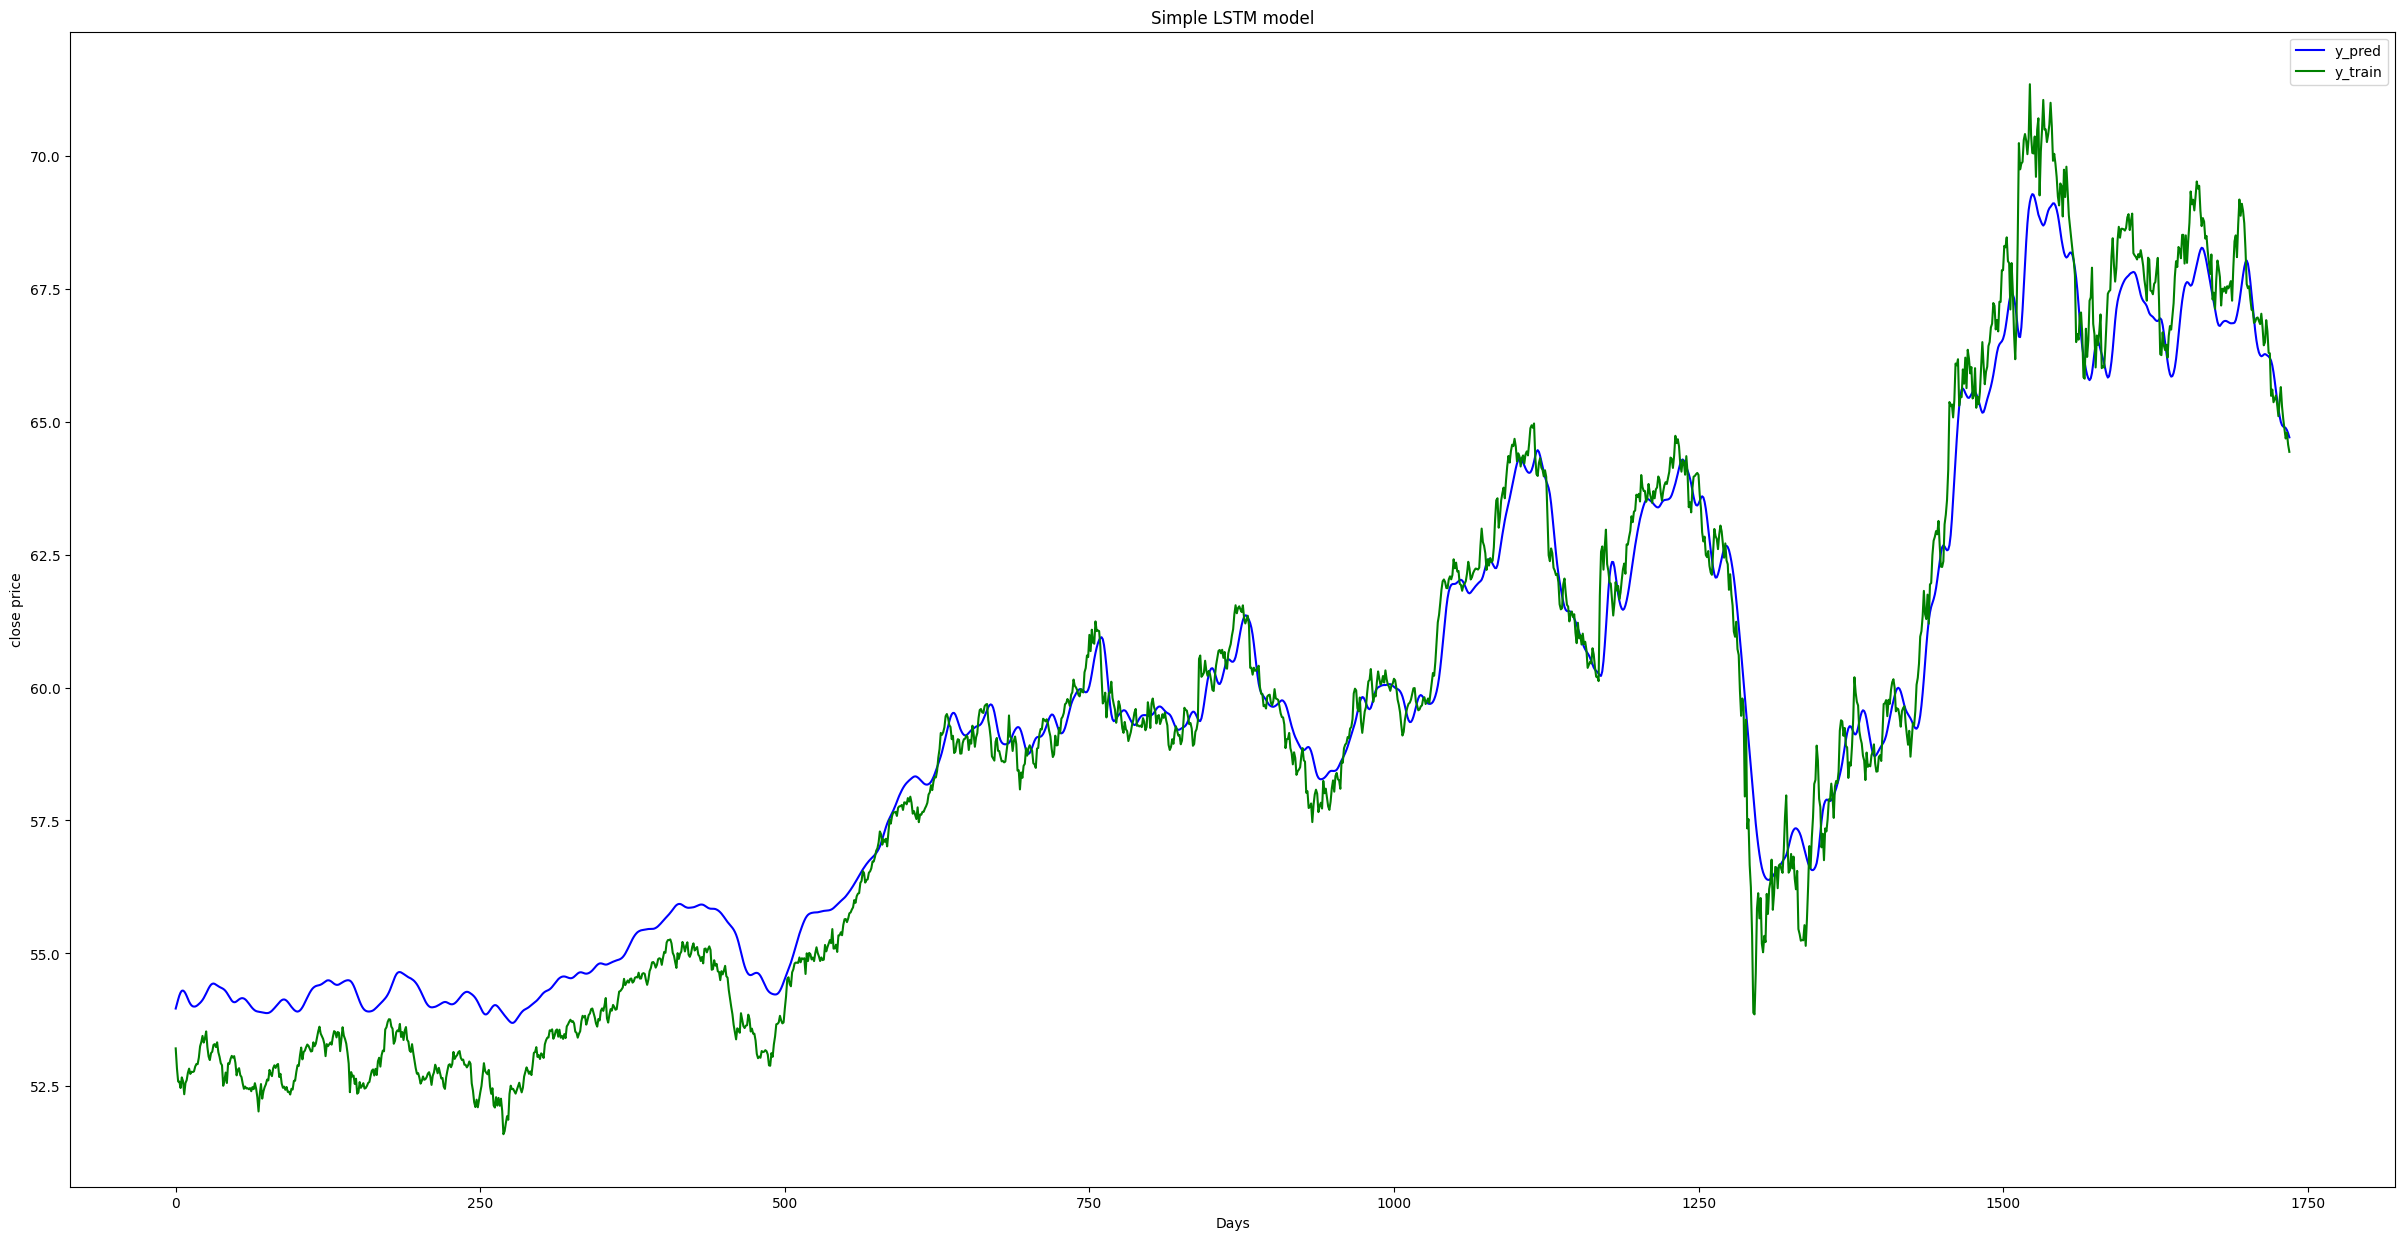

In [ ]:
plt.figure(figsize = (30,15))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple LSTM model")
plt.legend()
plt.show()

##Making Predictions

In [ ]:
y_pred_test=scaler.inverse_transform(model.predict(x_test_final))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


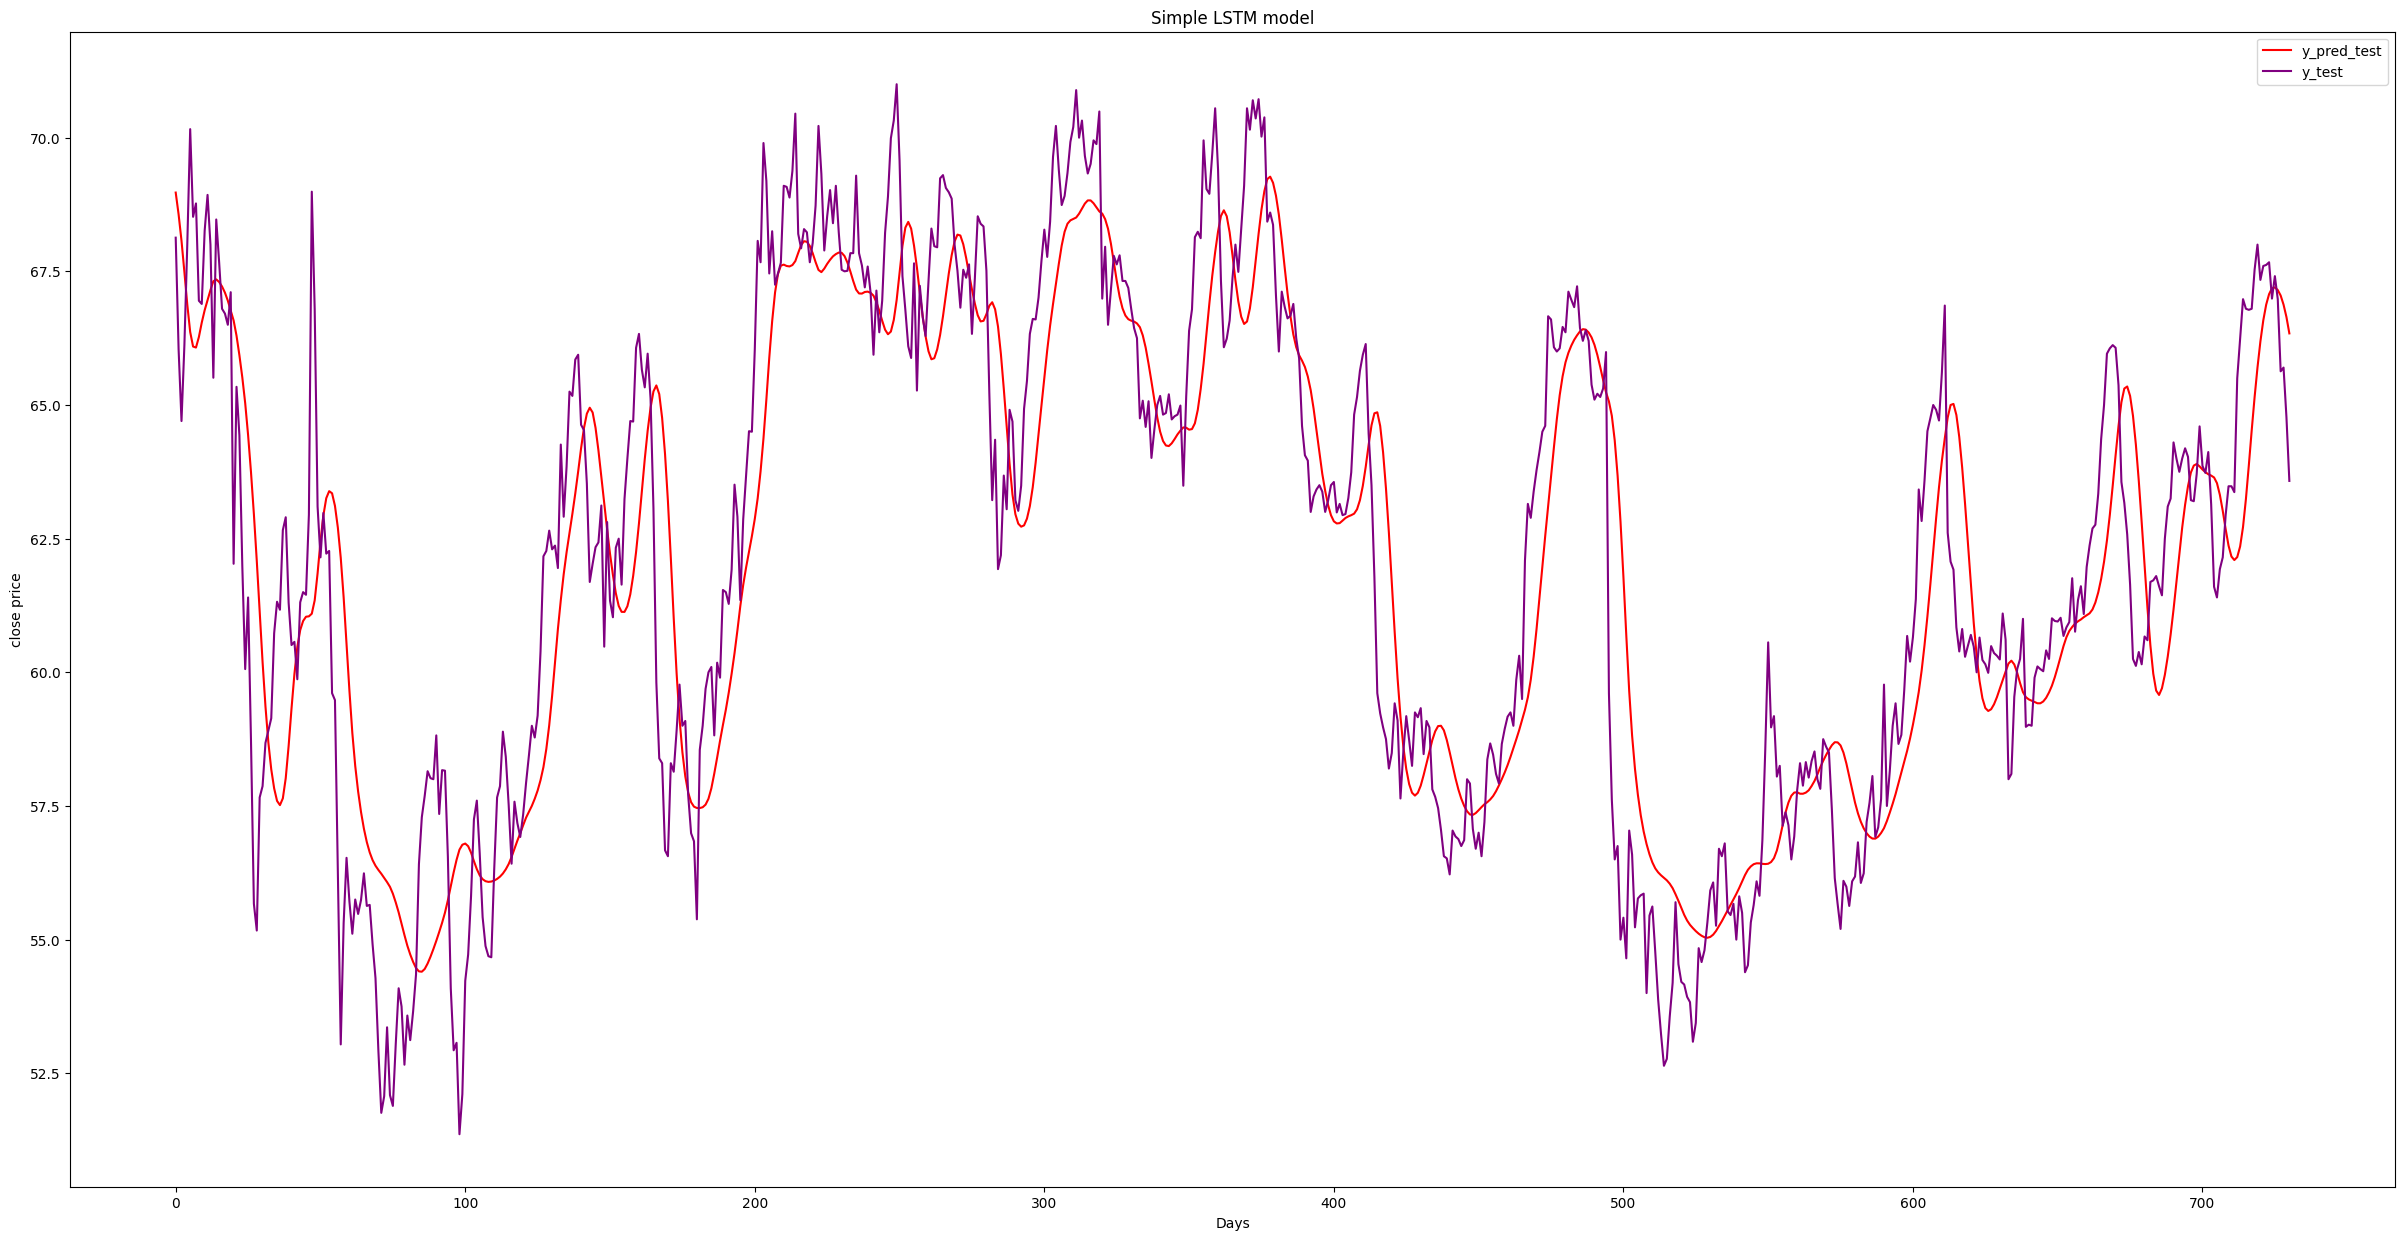

In [ ]:
plt.figure(figsize = (30,15))
plt.plot(y_pred_test, color = "red", label = "y_pred_test" )
plt.plot(scaler.inverse_transform(y_test_final), color = "purple", label = "y_test")
plt.xlabel("Days")
plt.ylabel("close price")
plt.title("Simple LSTM model")
plt.legend()
plt.show()

In [ ]:
model.save('price_predictor_model.keras')